In [1]:
import numpy as np
size = '2mm'

In [2]:
if size == '1,936mm':
    data_pm = np.loadtxt('Tmatrix/' + size + '/phase_matrix.txt')
    Z11_Tmatrix = data_pm[:,1]#*1E-12
    Z22_Tmatrix = data_pm[:,3]#*1E-12
    Z33_Tmatrix = data_pm[:,4]#*1E-12
    Z44_Tmatrix = data_pm[:,5]#*1E-12
    Z12_Tmatrix = data_pm[:,2]#*1E-12
    Z34_Tmatrix = -data_pm[:,6]#*1E-12
    Tmatrix_coords = data_pm[:,0]
    Tmatrix_coords = np.radians(Tmatrix_coords)
    data_SSPs = np.loadtxt('Tmatrix/' + size + '/SSPs.txt')
    Cext_Tmatrix = data_SSPs[0] #* 1E-12 #converting to meters^2
    Csca_Tmatrix = data_SSPs[1] #* 1E-12
    g_Tmatrix = data_SSPs[2]
    w_Tmatrix = Cext_Tmatrix/Csca_Tmatrix
    Cbsca_Tmatrix = Z11_Tmatrix[-1] * Csca_Tmatrix
else:
    data_pm = np.loadtxt('Tmatrix/' + size + '/phase_matrix.txt')
    Z11_Tmatrix = data_pm[:,1]#*1E-12
    Z22_Tmatrix = data_pm[:,3]#*1E-12
    Z33_Tmatrix = data_pm[:,4]#*1E-12
    Z44_Tmatrix = data_pm[:,6]#*1E-12
    Z12_Tmatrix = data_pm[:,2]#*1E-12
    Z34_Tmatrix = -data_pm[:,5]#*1E-12
    Tmatrix_coords = data_pm[:,0]
    Tmatrix_coords = np.radians(Tmatrix_coords)
    data_SSPs = np.loadtxt('Tmatrix/' + size + '/SSPs.txt')
    Cext_Tmatrix = data_SSPs[0] #* 1E-12 #converting to meters^2
    Csca_Tmatrix = data_SSPs[1] #* 1E-12
    g_Tmatrix = data_SSPs[3]
    w_Tmatrix = data_SSPs[2]
    Cbsca_Tmatrix = Z11_Tmatrix[-1] * Csca_Tmatrix

In [ ]:
# data_pm = np.loadtxt('DDA/' + size + '/phase_matrix.txt')
# Z11_DDA = data_pm[:,1]#*1E-12
# Z22_DDA = data_pm[:,3]#*1E-12
# Z33_DDA = data_pm[:,4]#*1E-12
# Z44_DDA = data_pm[:,6]#*1E-12
# Z12_DDA = data_pm[:,2]#*1E-12
# Z34_DDA = data_pm[:,5]#*1E-12
# DDA_coords = data_pm[:,0]
# DDA_coords = np.radians(DDA_coords)

In [ ]:
# data_SSPs = np.loadtxt('DDA/' + size + '/SSPs.txt')
# Cext_Tmatrix = data_SSPs[0] #* 1E-12 #converting to meters^2
# Csca_Tmatrix = data_SSPs[1] #* 1E-12
# # g_Tmatrix = data_SSPs[3]
# # w_Tmatrix = data_SSPs[2]
# Cbsca_Tmatrix = Z11_Tmatrix[-1] * Csca_Tmatrix

In [3]:
with open('results/' + size + '/temperature200/timings_20_230leb_15gauss.txt', 'r') as file:
    line = file.readlines()

Cext_bem = line[5]
Csca_bem = line[6]
Cbsca_bem = line[7]
g_bem = line[8]
w_bem = line[9]

Cext_bem = float(Cext_bem.replace('Cext avg: ', ''))
Csca_bem = float(Csca_bem.replace('Csca avg: ', ''))
Cbsca_bem = float(Cbsca_bem.replace('Cbsca avg: ', ''))
g_bem = float(g_bem.replace('g avg: ', ''))
w_bem = float(w_bem.replace('w avg: ', ''))

Z11_bem = np.loadtxt('results/' + size + '/temperature200/Z11_20_230leb_15gauss.txt')
Z12_bem = np.loadtxt('results/' + size + '/temperature200/Z12_20_230leb_15gauss.txt')
Z22_bem = np.loadtxt('results/' + size + '/temperature200/Z22_20_230leb_15gauss.txt')
Z33_bem = np.loadtxt('results/' + size + '/temperature200/Z33_20_230leb_15gauss.txt')
Z34_bem = np.loadtxt('results/' + size + '/temperature200/Z34_20_230leb_15gauss.txt')
Z44_bem = np.loadtxt('results/' + size + '/temperature200/Z44_20_230leb_15gauss.txt')

In [ ]:
# Cext_perwave = line[15].replace('Cext: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cext_perwave = [float(i) for i in Cext_perwave]
# Csca_perwave = line[16].replace('Csca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Csca_perwave = [float(i) for i in Csca_perwave]
# Cbsca_perwave = line[17].replace('Cbsca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cbsca_perwave = [float(i) for i in Cbsca_perwave]
# g_perwave = line[18].replace('g: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# g_perwave = [float(i) for i in g_perwave]
# w_perwave = line[19].replace('w: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# w_perwave = [float(i) for i in w_perwave]

In [ ]:
# print([i for i in Cext_perwave if i<0])
# print([i for i in g_perwave if i<0])
# print([i for i in g_perwave if i>1])
# print([i for i in w_perwave if i<0])
# print([i for i in w_perwave if i>1])

In [ ]:
# with open('results-v2/' + size + '/temperature200/timings_20_50leb_15gauss.txt', 'r') as file:
#     line = file.readlines()

# Cext_bem_20 = line[5]
# Csca_bem_20 = line[6]
# Cbsca_bem_20 = line[7]
# g_bem_20 = line[8]
# w_bem_20 = line[9]

# Cext_bem_20 = float(Cext_bem_20.replace('Cext avg: ', ''))
# Csca_bem_20 = float(Csca_bem_20.replace('Csca avg: ', ''))
# Cbsca_bem_20 = float(Cbsca_bem_20.replace('Cbsca avg: ', ''))
# g_bem_20 = float(g_bem_20.replace('g avg: ', ''))
# w_bem_20 = float(w_bem_20.replace('w avg: ', ''))


# Z11_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z11_20_50leb_15gauss.txt')
# Z12_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z12_20_50leb_15gauss.txt')
# Z22_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z22_20_50leb_15gauss.txt')
# Z33_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z33_20_50leb_15gauss.txt')
# Z34_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z34_20_50leb_15gauss.txt')
# Z44_bem_20 = np.loadtxt('results/' + size + '/temperature200/Z44_20_50leb_15gauss.txt')

In [ ]:
# Cext_perwave_20 = line[15].replace('Cext: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cext_perwave_20 = [float(i) for i in Cext_perwave_20]
# Csca_perwave_20 = line[16].replace('Csca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Csca_perwave_20 = [float(i) for i in Csca_perwave_20]
# Cbsca_perwave_20 = line[17].replace('Cbsca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cbsca_perwave_20 = [float(i) for i in Cbsca_perwave_20]
# g_perwave_20 = line[18].replace('g: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# g_perwave_20 = [float(i) for i in g_perwave_20]
# w_perwave_20 = line[19].replace('w: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# w_perwave_20 = [float(i) for i in w_perwave_20]
# print([i for i in Cext_perwave_20 if i<0])
# print([i for i in g_perwave_20 if i<0])
# print([i for i in g_perwave_20 if i>1])
# print([i for i in w_perwave_20 if i<0])
# print([i for i in w_perwave_20 if i>1])

In [ ]:
# with open('results/' + size + '/temperature200/timings_50_14leb_10gauss.txt', 'r') as file:
#     line = file.readlines()

# Cext_bem_50 = line[5]
# Csca_bem_50 = line[6]
# Cbsca_bem_50 = line[7]
# g_bem_50 = line[8]
# w_bem_50 = line[9]

# Cext_bem_50 = float(Cext_bem_50.replace('Cext avg: ', ''))
# Csca_bem_50 = float(Csca_bem_50.replace('Csca avg: ', ''))
# Cbsca_bem_50 = float(Cbsca_bem_50.replace('Cbsca avg: ', ''))
# g_bem_50 = float(g_bem_50.replace('g avg: ', ''))
# w_bem_50 = float(w_bem_50.replace('w avg: ', ''))


# Z11_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z11_50_14leb_10gauss.txt')
# Z12_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z12_50_14leb_10gauss.txt')
# Z22_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z22_50_14leb_10gauss.txt')
# Z33_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z33_50_14leb_10gauss.txt')
# Z34_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z34_50_14leb_10gauss.txt')
# Z44_bem_50 = np.loadtxt('results/' + size + '/temperature200/Z44_50_14leb_10gauss.txt')

In [ ]:
# Cext_perwave_50 = line[15].replace('Cext: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cext_perwave_50 = [float(i) for i in Cext_perwave_50]
# Csca_perwave_50 = line[16].replace('Csca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Csca_perwave_50 = [float(i) for i in Csca_perwave_50]
# Cbsca_perwave_50 = line[17].replace('Cbsca: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# Cbsca_perwave_50 = [float(i) for i in Cbsca_perwave_50]
# g_perwave_50 = line[18].replace('g: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# g_perwave_50 = [float(i) for i in g_perwave_50]
# w_perwave_50 = line[19].replace('w: ', '').replace('\n','').strip('][').replace(']','').replace('[','').split(',')
# w_perwave_50 = [float(i) for i in w_perwave_50]
# print([i for i in Cext_perwave_50 if i<0])
# print([i for i in g_perwave_50 if i<0])
# print([i for i in g_perwave_50 if i>1])
# print([i for i in w_perwave_50 if i<0])
# print([i for i in w_perwave_50 if i>1])

In [4]:
print("Error in Csca: {0:.5%}".format(abs(Csca_bem - Csca_Tmatrix)/Csca_Tmatrix))
print("Error in Cext: {0:.5%}".format(abs(Cext_bem - Cext_Tmatrix)/Cext_Tmatrix))
print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem - Cbsca_Tmatrix)/Cbsca_Tmatrix))
print("Error in g: {0:.5%}".format(abs(g_bem - g_Tmatrix)/g_Tmatrix))
print("Error in w: {0:.5%}".format(abs(w_bem - w_Tmatrix)/w_Tmatrix))


Error in Csca: 6.33876%
Error in Cext: 7.23022%
Error in Cbsca: 8.67416%
Error in g: 0.35544%
Error in w: 0.83255%


In [5]:
print('Cext = {0}'.format(Cext_Tmatrix))
print('Csca = {0}'.format(Csca_Tmatrix))
print('Cbsca = {0}'.format(Cbsca_Tmatrix))
print('g = {0}'.format(g_Tmatrix))
print('w = {0}'.format(w_Tmatrix))

Cext = 3.601533e-06
Csca = 3.336227e-06
Cbsca = 2.0477928137350003e-06
g = 0.59739
w = 0.92633


In [6]:
print('Cext = {0}'.format(Cext_bem))
print('Csca = {0}'.format(Csca_bem))
print('Cbsca = {0}'.format(Cbsca_bem))
print('g = {0}'.format(g_bem))
print('w = {0}'.format(w_bem))

Cext = 3.341134403585383e-06
Csca = 3.12475142483322e-06
Cbsca = 1.870163931180775e-06
g = 0.5952666333215006
w = 0.9340421629703934


In [ ]:
# print("Error in Csca: {0:.5%}".format(abs(Csca_bem_20 - Csca_Tmatrix)/Csca_Tmatrix))
# print("Error in Cext: {0:.5%}".format(abs(Cext_bem_20 - Cext_Tmatrix)/Cext_Tmatrix))
# print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem_20 - Cbsca_Tmatrix)/Cbsca_Tmatrix))
# print("Error in g: {0:.5%}".format(abs(g_bem_20 - g_Tmatrix)/g_Tmatrix))
# print("Error in w: {0:.5%}".format(abs(w_bem_20 - w_Tmatrix)/w_Tmatrix))

In [ ]:

# print("Error in Csca: {0:.5%}".format(abs(Csca_bem_50 - Csca_Tmatrix)/Csca_Tmatrix))
# print("Error in Cext: {0:.5%}".format(abs(Cext_bem_50 - Cext_Tmatrix)/Cext_Tmatrix))
# print("Error in Cbsca: {0:.5%}".format(abs(Cbsca_bem_50 - Cbsca_Tmatrix)/Cbsca_Tmatrix))
# print("Error in g: {0:.5%}".format(abs(g_bem_50 - g_Tmatrix)/g_Tmatrix))
# print("Error in w: {0:.5%}".format(abs(w_bem_50 - w_Tmatrix)/w_Tmatrix))

Text(0.5,1,'Z44')

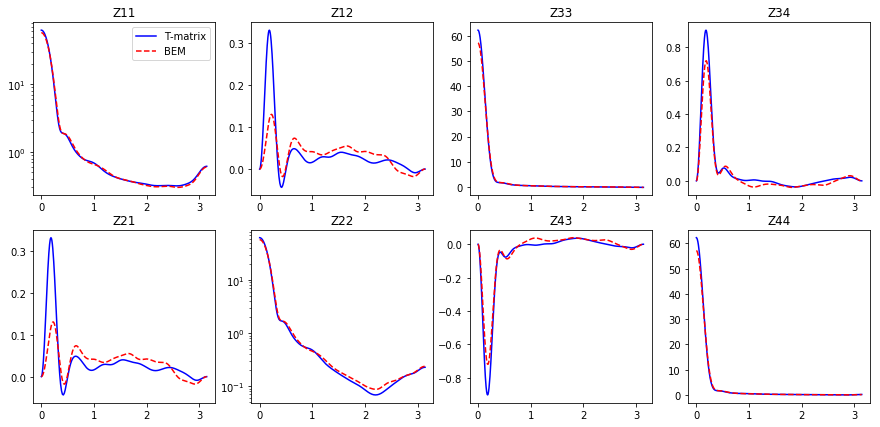

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
scaling = 4*np.pi/Csca_bem#*1.0888010560282591
angles_theta = np.linspace(0,np.pi,1801)

fig, axs = plt.subplots(2, 4, figsize = (15,7))
axs[0, 0].semilogy(Tmatrix_coords, Z11_Tmatrix, 'b', label = 'T-matrix')
axs[0, 0].semilogy(angles_theta, scaling*Z11_bem, '--r', label = 'BEM')
# axs[0, 0].semilogy(DDA_coords, Z11_DDA, label = 'DDA')
axs[0, 0].set_title('Z11')
axs[0, 0].legend()

axs[0, 1].plot(Tmatrix_coords, Z12_Tmatrix, 'b', label = 'T-matrix')
axs[0, 1].plot(angles_theta, scaling*Z12_bem, '--r', label = 'BEM')
# axs[0, 1].plot(DDA_coords, Z12_DDA,  label = 'DDA')
axs[0, 1].set_title('Z12')
# axs[0, 1].legend()

axs[1, 0].plot(Tmatrix_coords, Z12_Tmatrix, 'b', label = 'T-matrix')
axs[1, 0].plot(angles_theta, scaling*Z12_bem, '--r', label = 'BEM')
# axs[1, 0].plot(DDA_coords, Z12_DDA,  label = 'DDA')
axs[1, 0].set_title('Z21')
# axs[1, 0].legend()

axs[1, 1].semilogy(Tmatrix_coords, Z22_Tmatrix, 'b', label = 'T-matrix')
axs[1, 1].semilogy(angles_theta, scaling*Z22_bem, '--r', label = 'BEM')
# axs[1, 1].semilogy(DDA_coords, Z22_DDA, label = 'DDA')
axs[1, 1].set_title('Z22')
# axs[1, 1].legend()

axs[0, 2].plot(Tmatrix_coords, Z33_Tmatrix, 'b', label = 'T-matrix')
axs[0, 2].plot(angles_theta,scaling* Z33_bem, '--r', label = 'BEM')
# axs[0, 2].plot(DDA_coords, Z33_DDA, label = 'DDA')
axs[0, 2].set_title('Z33')
# axs[0, 2].legend()

axs[0, 3].plot(Tmatrix_coords, Z34_Tmatrix, 'b', label = 'T-matrix')
axs[0, 3].plot(angles_theta,scaling* Z34_bem, '--r', label = 'BEM')
# axs[0, 3].plot(DDA_coords, Z34_DDA, label = 'DDA')
axs[0, 3].set_title('Z34')
# axs[0, 3].set_ylim([-0.2, 0.2])
# axs[0, 3].legend()

axs[1, 2].plot(Tmatrix_coords, -Z34_Tmatrix, 'b', label = 'T-matrix')
axs[1, 2].plot(angles_theta,-scaling* Z34_bem, '--r', label = 'BEM')
# axs[1, 2].plot(DDA_coords, -Z34_DDA, label = 'DDA')
axs[1, 2].set_title('Z43')
# axs[1, 2].set_ylim([-0.2, 0.2])
# axs[1, 2].legend()

axs[1, 3].plot(Tmatrix_coords, Z44_Tmatrix, 'b', label = 'T-matrix')
axs[1, 3].plot(angles_theta,scaling* Z44_bem, '--r', label = 'BEM')
# axs[1, 3].plot(DDA_coords, Z44_DDA, label = 'DDA')
axs[1, 3].set_title('Z44')
# axs[1, 3].legend()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
scaling = 4*np.pi/Csca_bem
scaling2 = 4*np.pi/Csca_bem_20
scaling3 = 4*np.pi/Csca_bem_50
angles_theta = np.linspace(0,np.pi,1801)

fig, axs = plt.subplots(2, 4, figsize = (15,7))
axs[0, 0].semilogy(Tmatrix_coords, Z11_Tmatrix, 'b', label = 'T-matrix')
axs[0, 0].semilogy(angles_theta, scaling*Z11_bem, '--r', label = 'BEM-10')
axs[0, 0].semilogy(angles_theta, scaling2*Z11_bem_20, '--y', label = 'BEM-20')
axs[0, 0].semilogy(angles_theta, scaling3*Z11_bem_50, '--g', label = 'BEM-50')
axs[0, 0].set_title('Z11')
axs[0, 0].legend()

axs[0, 1].plot(Tmatrix_coords, Z12_Tmatrix, 'b', label = 'T-matrix')
axs[0, 1].plot(angles_theta, scaling*Z12_bem, '--r', label = 'BEM-10')
axs[0, 1].plot(angles_theta, scaling2*Z12_bem_20, '--y', label = 'BEM-20')
axs[0, 1].plot(angles_theta, scaling3*Z12_bem_50, '--g', label = 'BEM-50')
axs[0, 1].set_title('Z12')
# axs[0, 1].legend()

axs[1, 0].plot(Tmatrix_coords, Z12_Tmatrix, 'b', label = 'T-matrix')
axs[1, 0].plot(angles_theta, scaling*Z12_bem, '--r', label = 'BEM-10')
axs[1, 0].plot(angles_theta, scaling2*Z12_bem_20, '--y', label = 'BEM-20')
axs[1, 0].plot(angles_theta, scaling3*Z12_bem_50, '--g', label = 'BEM-50')
axs[1, 0].set_title('Z21')
# axs[1, 0].legend()

axs[1, 1].semilogy(Tmatrix_coords, Z22_Tmatrix, 'b', label = 'T-matrix')
axs[1, 1].semilogy(angles_theta, scaling*Z22_bem, '--r', label = 'BEM-10')
axs[1, 1].semilogy(angles_theta, scaling2*Z22_bem_20, '--y', label = 'BEM-20')
axs[1, 1].semilogy(angles_theta, scaling3*Z22_bem_50, '--g', label = 'BEM-50')
axs[1, 1].set_title('Z22')
# axs[1, 1].legend()

axs[0, 2].plot(Tmatrix_coords, Z33_Tmatrix, 'b', label = 'T-matrix')
axs[0, 2].plot(angles_theta,scaling* Z33_bem, '--r', label = 'BEM-10')
axs[0, 2].plot(angles_theta,scaling2* Z33_bem_20, '--y', label = 'BEM-20')
axs[0, 2].plot(angles_theta,scaling3* Z33_bem_50, '--g', label = 'BEM-50')
axs[0, 2].set_title('Z33')
# axs[0, 2].legend()

axs[0, 3].plot(Tmatrix_coords, Z34_Tmatrix, 'b', label = 'T-matrix')
axs[0, 3].plot(angles_theta,scaling* Z34_bem, '--r', label = 'BEM-10')
axs[0, 3].plot(angles_theta,scaling2* Z34_bem_20, '--y', label = 'BEM-20')
axs[0, 3].plot(angles_theta,scaling3* Z34_bem_50, '--g', label = 'BEM-50')
axs[0, 3].set_title('Z34')
# axs[0, 3].set_ylim([-0.2, 0.2])
# axs[0, 3].legend()

axs[1, 2].plot(Tmatrix_coords, -Z34_Tmatrix, 'b', label = 'T-matrix')
axs[1, 2].plot(angles_theta,-scaling* Z34_bem, '--r', label = 'BEM-10')
axs[1, 2].plot(angles_theta,-scaling2* Z34_bem_20, '--y', label = 'BEM-20')
axs[1, 2].plot(angles_theta,-scaling3* Z34_bem_50, '--g', label = 'BEM-50')
axs[1, 2].set_title('Z43')
# axs[1, 2].set_ylim([-0.2, 0.2])
# axs[1, 2].legend()

axs[1, 3].plot(Tmatrix_coords, Z44_Tmatrix, 'b', label = 'T-matrix')
axs[1, 3].plot(angles_theta,scaling* Z44_bem, '--r', label = 'BEM-10')
axs[1, 3].plot(angles_theta,scaling2* Z44_bem_20, '--y', label = 'BEM-20')
axs[1, 3].plot(angles_theta,scaling3* Z44_bem_50, '--g', label = 'BEM-50')
axs[1, 3].set_title('Z44')
# axs[1, 3].legend()